# Clustering Countries (CIA Factbook)

**Resource**: Datasets consist of US official data: https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

**Goal**: Dividing the countries of the world into clusters by taking advantage of the similarity between them. These clusters will represent countries with similar characteristics.To accomplish that:
- Building a KMeans Clustering Model
- EDA 
- Evaluating model performance with test dataset.
- Getting feature importances 
- Rebuilding model with most important features
- Evaluating model performance with test dataset.

### Importing The Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset ("CIA_Country_Facts.csv")

In [2]:
# Loading dataset
data = pd.read_csv("CIA_Country_Facts.csv")

In [3]:
# Copy dataset 
df = data.copy()
df.head(6).T

,0,1,2,3,4,5
Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola
Region,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,OCEANIA,WESTERN EUROPE,SUB-SAHARAN AFRICA
Population,31056997,3581655,32930091,57794,71201,12127071
Area (sq. mi.),647500,28748,2381740,199,468,1246700
Pop. Density (per sq. mi.),48.0,124.6,13.8,290.4,152.1,9.7
Coastline (coast/area ratio),0.0,1.26,0.04,58.29,0.0,0.13
Net migration,23.06,-4.93,-0.39,-20.71,6.6,0.0
Infant mortality (per 1000 births),163.07,21.52,31.0,9.27,4.05,191.19
GDP ($ per capita),700.0,4500.0,6000.0,8000.0,19000.0,1900.0
Literacy (%),36.0,86.5,70.0,97.0,100.0,42.0


## Dataset Info and Descriptives

In [4]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [5]:
# Descriptive Statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


## EDA

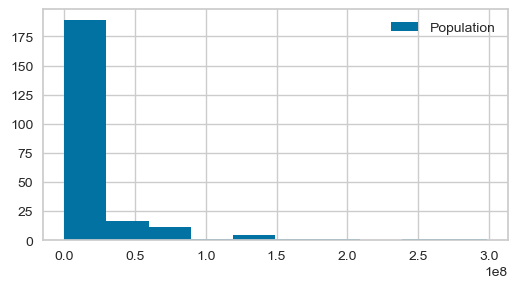

In [6]:
# Looking distribution of countries population which is below 5 millions.
plt.figure(figsize=(6,3))
df[df["Population"]<500000000]["Population"].hist(bins = 10, legend = True)
plt.show()

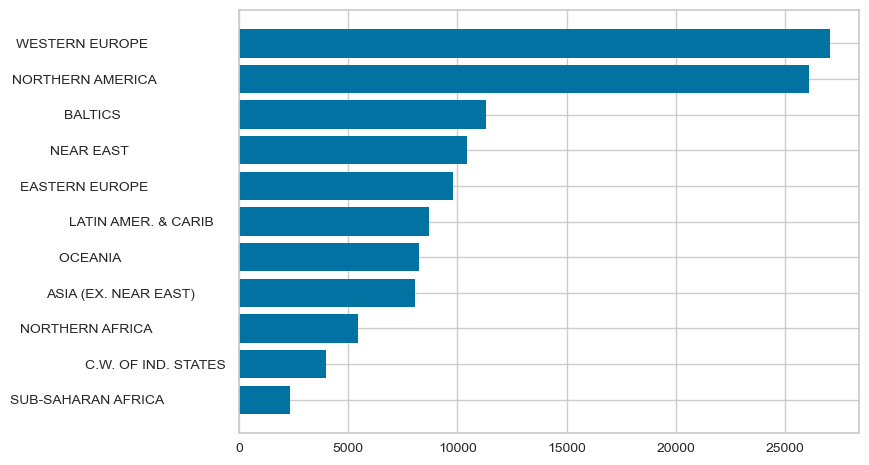

<Figure size 600x800 with 0 Axes>

In [7]:
# Looking region based GDP per capita
GDP_Region = df.groupby(["Region"])["GDP ($ per capita)"].mean().sort_values()
plt.barh(GDP_Region.index, width = GDP_Region.values)
plt.figure(figsize=(6,8))
plt.show()

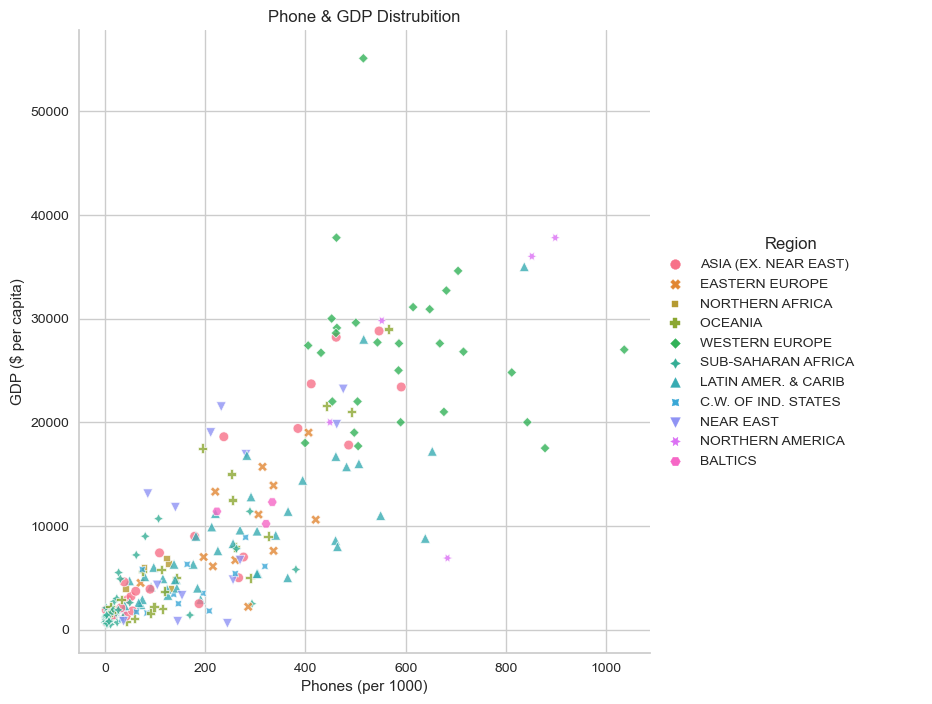

In [8]:
# Scatterplot of phones per 1000 & GDB per capita
sns.relplot(
    data=df, x="Phones (per 1000)", y="GDP ($ per capita)",
    hue="Region", style="Region", 
    kind="scatter", alpha = 0.8, height=7, aspect=1
            )
plt.title("Phone & GDP Distrubition")
plt.xlabel("Phones (per 1000)")
plt.ylabel("GDP ($ per capita)")
plt.show()

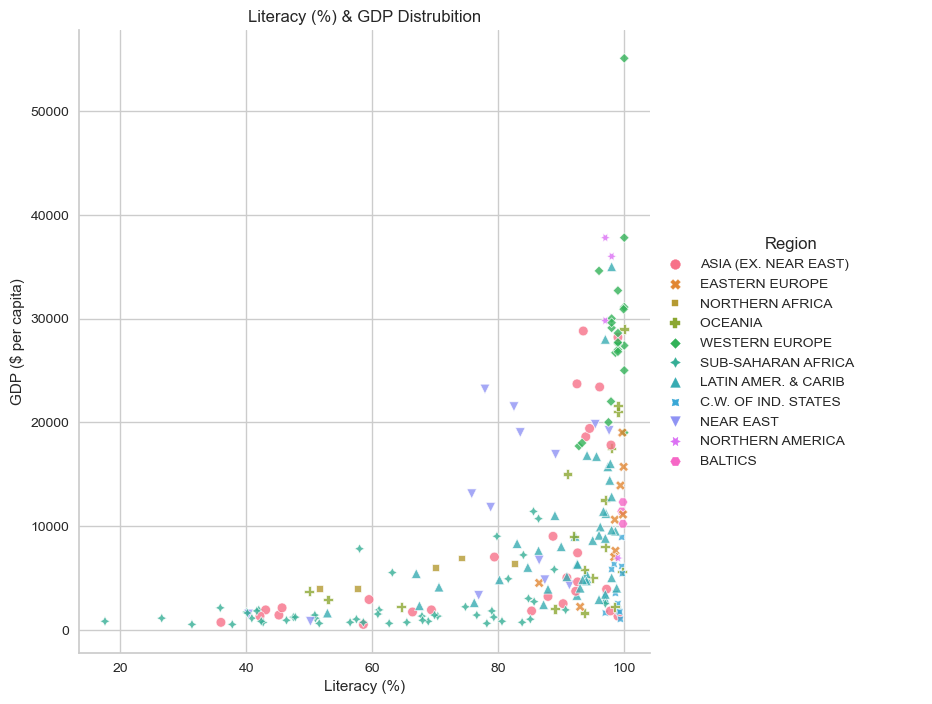

In [9]:
# Scatterplot of Literacy (%) & GDB per capita
sns.relplot(
    data=df, x="Literacy (%)", y="GDP ($ per capita)",
    hue="Region", style="Region",
    kind="scatter", alpha = 0.8, height=7, aspect=1
            )
plt.title("Literacy (%) & GDP Distrubition")
plt.xlabel("Literacy (%)")
plt.ylabel("GDP ($ per capita)")
plt.show()

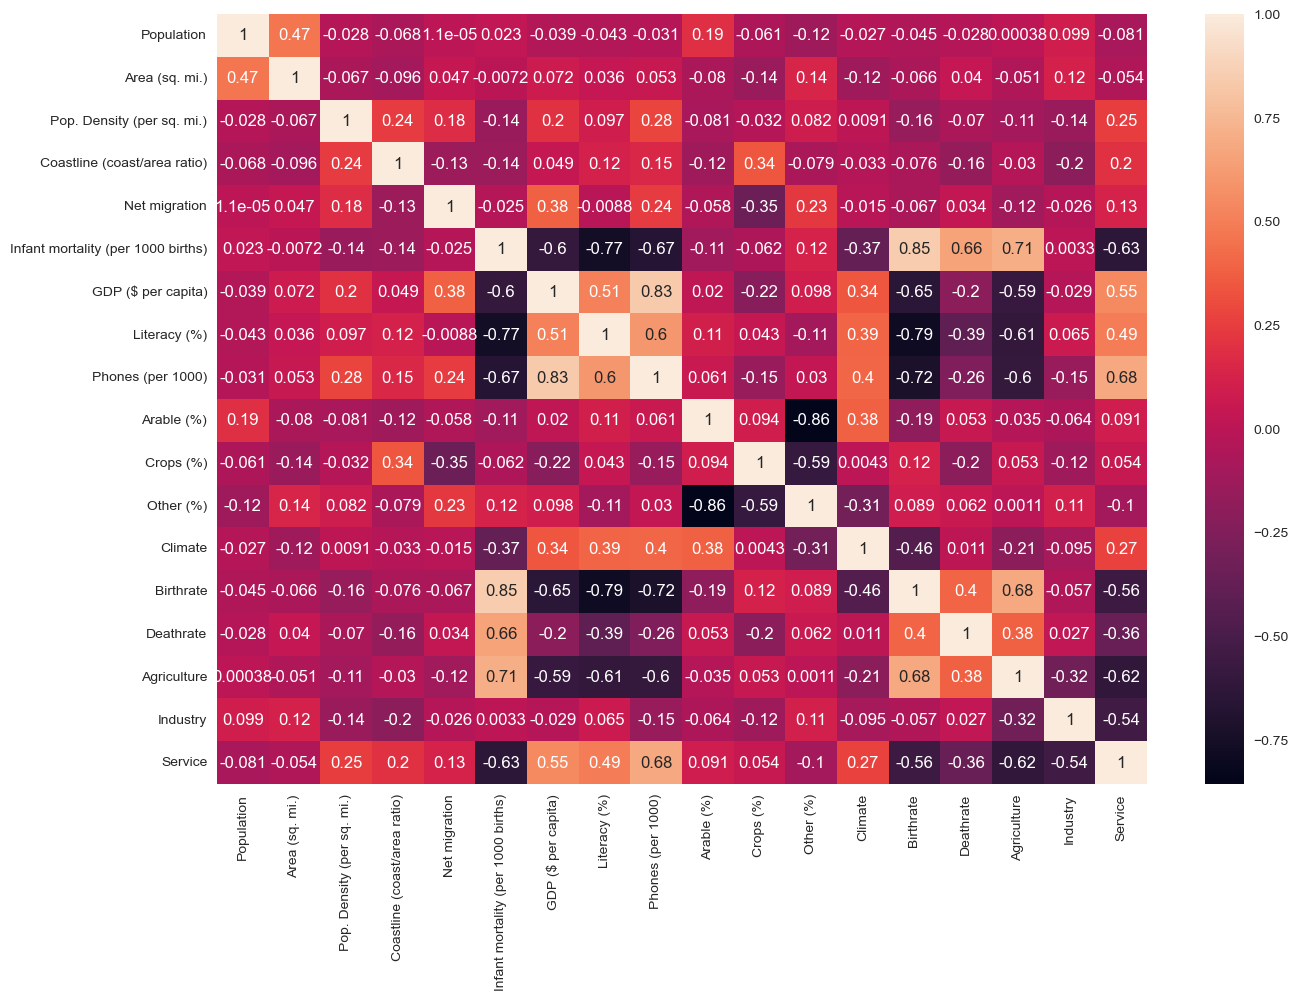

In [10]:
#Heatmap of correlations
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

## Imputation of Missing Values

In [11]:
# NaN values for each column
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [12]:
# Countries with NaN Agriculture value
df[df["Agriculture"].isna()]["Country"] 

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

#### The common trait of these contries is that they are islands.

In [13]:
# filling NaN agriculture values with 0
df["Agriculture"] = df["Agriculture"].fillna(0)
df["Agriculture"].isna().sum()

0

In [14]:
# Checking NaN values for each column, one can see that NaN values for Agriculture is zero.
NaN_values = df.isna().sum()
NaN_values

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                            0
Industry                              16
Service                               15
dtype: int64

In [15]:
NaN_list = [index for index, values in NaN_values.items() if values != 0]
NaN_list

['Net migration',
 'Infant mortality (per 1000 births)',
 'GDP ($ per capita)',
 'Literacy (%)',
 'Phones (per 1000)',
 'Arable (%)',
 'Crops (%)',
 'Other (%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Industry',
 'Service']

In [16]:
# Since our dataset has 227 rows, I decided to impute missing values with region means.

df[NaN_list] = df[NaN_list].fillna(df.groupby('Region')[NaN_list].transform('mean'))

In [17]:
# Checking NaN values for all columns, one can see that NaN values are now zero.
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

### Converting Categorical Variable to Numeric Variable

In [18]:
#There is no target variable, so df is actually equal to X.
X = df

In [19]:
# Dropping country feature since it is "unique identifier". 
X = X.drop("Country", axis = 1)
X.head(3)

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298


In [20]:
# Checking categorical variables
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Region                              227 non-null    object 
 1   Population                          227 non-null    int64  
 2   Area (sq. mi.)                      227 non-null    int64  
 3   Pop. Density (per sq. mi.)          227 non-null    float64
 4   Coastline (coast/area ratio)        227 non-null    float64
 5   Net migration                       227 non-null    float64
 6   Infant mortality (per 1000 births)  227 non-null    float64
 7   GDP ($ per capita)                  227 non-null    float64
 8   Literacy (%)                        227 non-null    float64
 9   Phones (per 1000)                   227 non-null    float64
 10  Arable (%)                          227 non-null    float64
 11  Crops (%)                           227 non-n

In [21]:
# Changing type of "Region" feature from categorical to numeric with get_dummies method
X = pd.get_dummies(X)
X.head().T

,0,1,2,3,4
Population,31056997.00,3581655.000,3.293009e+07,57794.000000,71201.000000
Area (sq. mi.),647500.00,28748.000,2.381740e+06,199.000000,468.000000
Pop. Density (per sq. mi.),48.00,124.600,1.380000e+01,290.400000,152.100000
Coastline (coast/area ratio),0.00,1.260,4.000000e-02,58.290000,0.000000
Net migration,23.06,-4.930,-3.900000e-01,-20.710000,6.600000
Infant mortality (per 1000 births),163.07,21.520,3.100000e+01,9.270000,4.050000
GDP ($ per capita),700.00,4500.000,6.000000e+03,8000.000000,19000.000000
Literacy (%),36.00,86.500,7.000000e+01,97.000000,100.000000
Phones (per 1000),3.20,71.200,7.810000e+01,259.500000,497.200000
Arable (%),12.13,21.090,3.220000e+00,10.000000,2.220000


In [22]:
# Checking X shape
X.shape

(227, 29)

### At the beginning we had 20 columns. After droping country and categorical to numeric transformation we have 29 column which is very much for a dataset having 227 rows. 

## Feature Scaling

In [23]:
scaler = StandardScaler()

In [24]:
scaled_X = scaler.fit_transform(X)

### Building KMeans models for  (K=2-30) 

- Calculating "Sum of Squared Distances" or "Inertia" for each K-Value.
- Plot K vs SSD using the Elbow Method
- Finding best value for K

In [25]:
# Inertia values for k values (K = 2-30)
inertia = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k, random_state=42)
    
    model.fit(scaled_X)
    
    inertia.append(model.inertia_)

In [26]:
# Checking inertia values
data = {"k value":range(2,30), 'inertia':inertia}
df_inertia = pd.DataFrame.from_dict(data)
df_inertia.T

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
k value,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,...,20.000000,21.00000,22.000000,23.000000,24.000000,25.000000,26.00000,27.0000,28.000000,29.000000
inertia,5556.109484,5002.100124,4679.400639,4382.911366,4093.843164,3766.283675,3520.661598,3253.434533,2969.415733,2769.447421,...,1663.124908,1593.85269,1543.363599,1529.305715,1456.665306,1427.155501,1354.42313,1308.5041,1301.591055,1278.338533


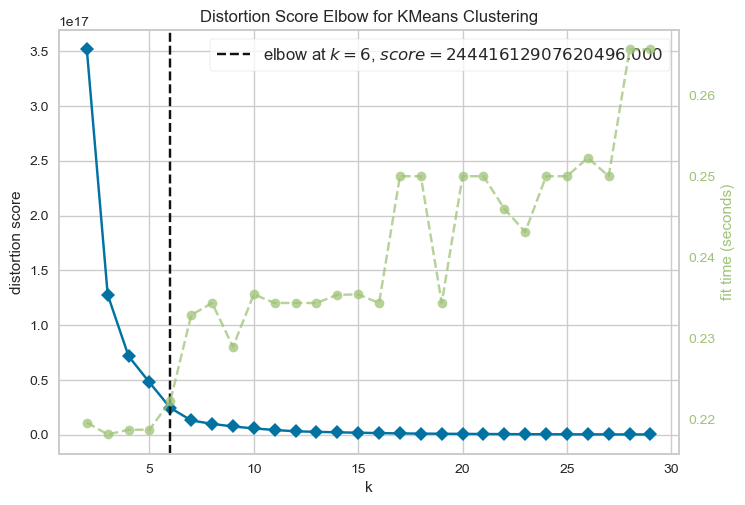

In [27]:
model = KMeans(random_state=42)
fig = KElbowVisualizer(model, k=(2,30))
fig.fit(X)
fig.show(width = 1, height = 1);

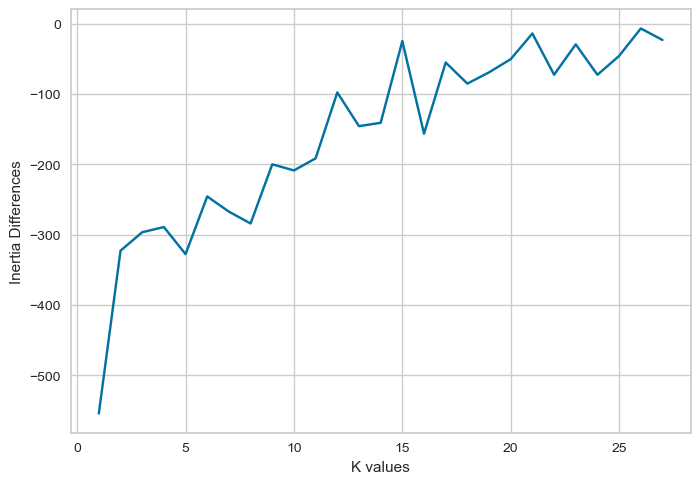

In [28]:
# inertia differences 
plt.plot(pd.Series(inertia).diff())
plt.xlabel("K values")
plt.ylabel("Inertia Differences")
plt.show()

### When look at inertia differences, one can say that at K=6, there is a peek value. Also, KElbowVisualizer suggest K=6. We may select 6 for K values. Lets look Silhoutte Score for further examination.

For n_clusters=2, the silhouette score is 0.16372848532755577
For n_clusters=3, the silhouette score is 0.16158471827806903
For n_clusters=4, the silhouette score is 0.180875983582169
For n_clusters=5, the silhouette score is 0.18331448310608459
For n_clusters=6, the silhouette score is 0.21586255538047378
For n_clusters=7, the silhouette score is 0.24590653179105518
For n_clusters=8, the silhouette score is 0.2686543181434587
For n_clusters=9, the silhouette score is 0.29435646603026344
For n_clusters=10, the silhouette score is 0.29261390631863293
For n_clusters=11, the silhouette score is 0.3213746411003911
For n_clusters=12, the silhouette score is 0.3224941479604318
For n_clusters=13, the silhouette score is 0.3399145023512101
For n_clusters=14, the silhouette score is 0.29105054606447756
For n_clusters=15, the silhouette score is 0.29695028048343103
For n_clusters=16, the silhouette score is 0.3151599677551187
For n_clusters=17, the silhouette score is 0.2835929465140069
For n_cl

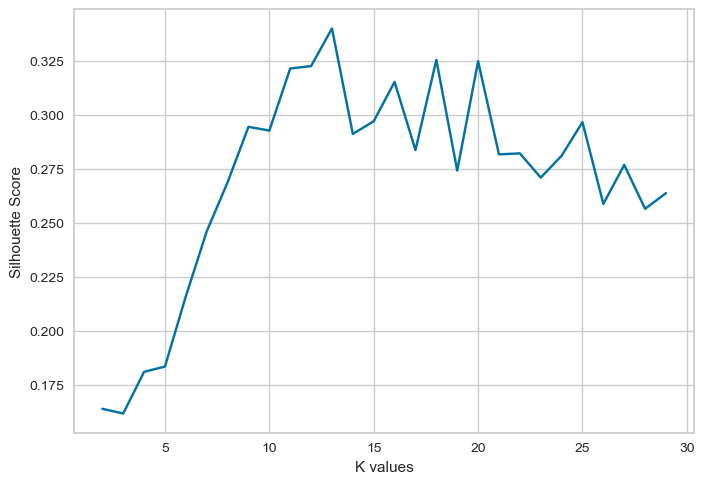

In [29]:
range_n_clusters = range(2,30)
silhouette_values = []
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = metrics.silhouette_score(scaled_X, cluster_labels)
    silhouette_values.append(silhouette_avg)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
plt.plot(pd.Series(silhouette_values, index = range(2,30)))
plt.xlabel("K values")
plt.ylabel("Silhouette Score")
plt.show()

#### Silhouette Score does not suggest same K value given by KElbowVisualizer method. We see peek value at K=13

### Let's assume that an expert informed us by saying number of cluster is three.

In [30]:
# Reproducing KMeans model with K=3

KM_model = KMeans(n_clusters=3, random_state=42)

In [31]:
# Fitting dataset

KM_model.fit(scaled_X)

KMeans(n_clusters=3, random_state=42)

In [32]:
KM_model.labels_

array([2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2,
       1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0,
       1, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0,
       2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0,
       1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2])

In [33]:
X["clusters"] = KM_model.labels_
X.sample(10)

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,clusters
38,45436,262,173.4,61.07,18.75,8.19,35000.0,98.0,836.3,3.85,...,0,0,1,0,0,0,0,0,0,1
132,3177388,1030700,3.1,0.07,0.00,70.89,1800.0,41.7,12.9,0.48,...,0,0,0,0,0,0,0,1,0,2
36,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,...,0,0,0,0,0,1,0,0,0,1
89,8308504,27750,299.4,6.38,-3.40,73.45,1600.0,52.9,16.9,28.30,...,0,0,1,0,0,0,0,0,0,2
210,28195754,236040,119.5,0.00,0.00,67.83,1400.0,69.9,3.6,25.88,...,0,0,0,0,0,0,0,1,0,2
33,8090068,27830,290.7,0.00,-0.06,69.29,600.0,51.6,3.4,35.05,...,0,0,0,0,0,0,0,1,0,2
39,4303356,622984,6.9,0.00,0.00,91.00,1100.0,51.0,2.3,3.10,...,0,0,0,0,0,0,0,1,0,2
51,11382820,110860,102.7,3.37,-1.58,6.33,2900.0,97.0,74.7,33.05,...,0,0,1,0,0,0,0,0,0,0
44,690948,2170,318.4,15.67,0.00,74.93,700.0,56.5,24.5,35.87,...,0,0,0,0,0,0,0,1,0,2
161,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,79.5,2.89,...,0,0,1,0,0,0,0,0,0,0


### Model Performance Evaluation with Silhouette Score

In [34]:
metrics.silhouette_score(scaled_X, KM_model.labels_)

0.16158471827806903

####  For K=3, score is 0.16 and it is low compared to most of K values calculated above.

### Rebuilding The Clustering Model with Fewer Attributes and Interpreting the Clusters

In [35]:
RFC= RandomForestClassifier()
RFC_X = X.drop("clusters", axis = 1)
y = X["clusters"]

In [36]:
RFC.fit(RFC_X, y)
RFC.feature_importances_

array([1.18762207e-02, 1.35126656e-02, 1.18697372e-02, 1.30476975e-02,
       3.11911397e-02, 1.56795625e-01, 7.42293540e-02, 5.97043017e-02,
       1.85268230e-01, 1.52192973e-02, 1.23658301e-02, 8.43784096e-03,
       3.86520150e-02, 1.27637034e-01, 9.69812585e-02, 2.88700482e-02,
       8.60846446e-03, 2.23494333e-02, 2.61293219e-04, 0.00000000e+00,
       3.89834417e-03, 8.66556988e-03, 4.04590526e-03, 7.16726545e-04,
       1.00668165e-04, 5.63125822e-03, 3.57983323e-03, 4.48065863e-02,
       1.16776211e-02])

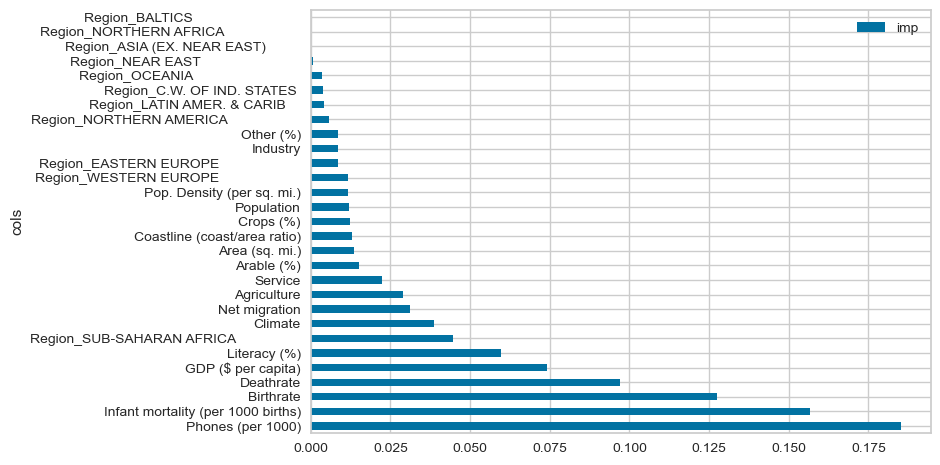

In [37]:
fi_df = pd.DataFrame({'cols':RFC_X.columns, 'imp':RFC.feature_importances_}).sort_values('imp', ascending=False)
fi_df.plot(kind="barh", x = 'cols')
plt.show()

In [38]:
# Reproducing KMeans model with K=3 and selected feature
KM_model2 = KMeans(n_clusters=3, random_state=42)

[0.1655377416752643, 0.25011494427002207, 0.28914814913522396, 0.32490350834817966, 0.3963990158198875, 0.3965672357147278, 0.4278650201163444, 0.4278650201163444, 0.41087014297552815, 0.41087014297552815, 0.4637451721921388, 0.4637451721921388, 0.4637451721921388, 0.5484661532991834, 0.5484661532991834, 0.5484661532991834]


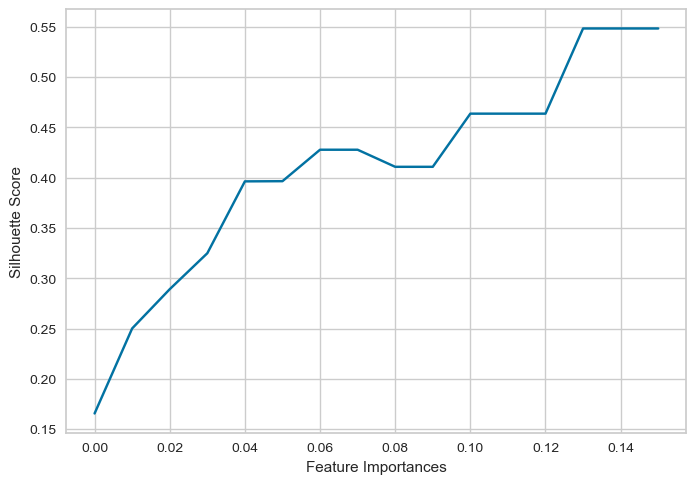

In [39]:
# Listing & Plotting Silhoutte Score calculated by using features having importances in range 0-0.16
scores = []
for value in np.arange(0,0.16,0.01):
    most_imp = fi_df[fi_df["imp"]>value]
    selected_X = X[most_imp["cols"]]
    SS_X = scaler.fit_transform(selected_X)
    KM_model2.fit(SS_X)
    score = metrics.silhouette_score(SS_X, KM_model2.labels_)
    scores.append(score)
print(scores)
plt.plot(pd.Series(scores, index = np.arange(0,0.16,0.01)))
plt.xlabel("Feature Importances")
plt.ylabel("Silhouette Score")
plt.show()

### Because of the peek value around 0.06 & 0.10, taking feature importance value as 0.08

In [52]:
# List of features having importances higher than 0.025
most_imp = fi_df[fi_df["imp"]>0.12]
most_imp

,cols,imp
8,Phones (per 1000),0.185268
5,Infant mortality (per 1000 births),0.156796
13,Birthrate,0.127637


In [53]:
# We may proceed with features listed below.
selected_X = X[most_imp["cols"]]
selected_X.head()

,Phones (per 1000),Infant mortality (per 1000 births),Birthrate
0,3.2,163.07,46.60
1,71.2,21.52,15.11
2,78.1,31.00,17.14
3,259.5,9.27,22.46
4,497.2,4.05,8.71


In [54]:
# Feature Scaling
SS_X = scaler.fit_transform(selected_X)

In [55]:
# Reproducing KMeans model with K=3 and selected feature
KM_model_final = KMeans(n_clusters=3, random_state=42)

In [56]:
# Fitting dataset
KM_model_final.fit(SS_X)

KMeans(n_clusters=3, random_state=42)

In [57]:
# Getting labels
KM_model_final.labels_

array([1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1,
       2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1,
       2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0,
       2, 0, 0, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 2,
       1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0,
       2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0,
       0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 1, 1, 1])

In [58]:
# Scoring of new model
metrics.silhouette_score(SS_X, KM_model_final.labels_)

0.4637451721921388

### Second model silhoutte score has better siloutte score. Let's plot our two model with most important 2 features.

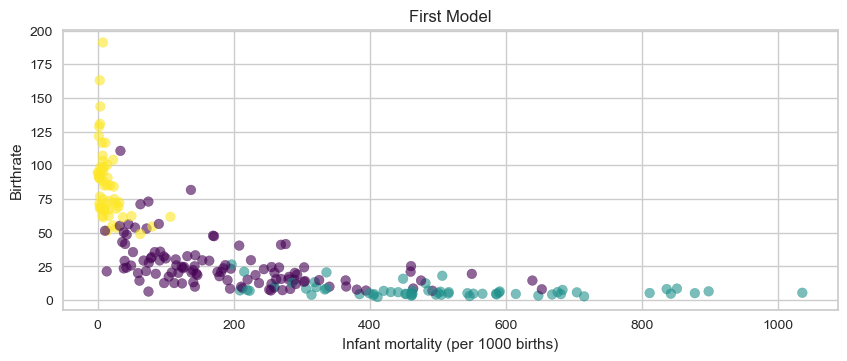

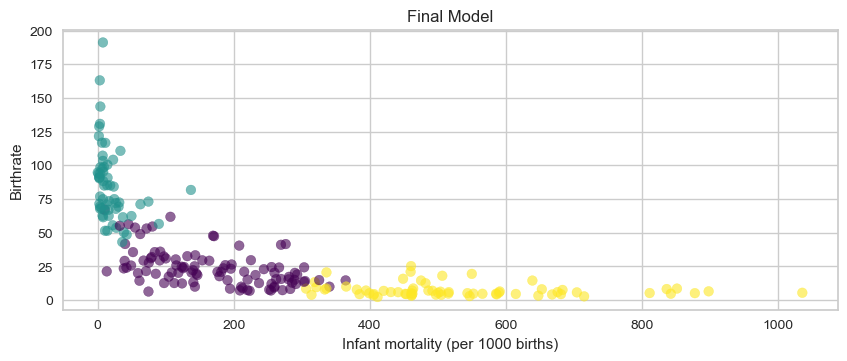

In [59]:
# Model 1
plt.figure(figsize=(10,8))
plt.subplot(2,1, 1)
plt.scatter(x=X["Phones (per 1000)"], y=X["Infant mortality (per 1000 births)"], c=KM_model.labels_, cmap="viridis", alpha=0.6)
plt.xlabel("Infant mortality (per 1000 births)")
plt.ylabel("Birthrate")
plt.title("First Model")
plt.show()

# Model 2
plt.figure(figsize=(10,8))
plt.subplot(2,1, 2)
plt.scatter(x=X["Phones (per 1000)"], y=X["Infant mortality (per 1000 births)"], c=KM_model_final.labels_, cmap="viridis", alpha=0.6)
plt.xlabel("Infant mortality (per 1000 births)")
plt.ylabel("Birthrate")
plt.title("Final Model")
plt.show()

### We may say that second model is better for this dataset regarding clustering data points. Clusters are more seperable.